# MusicLab 5 - GeoLocation Anonymization

This notebook will:
    
 1. import the geolocation information
 2. inspect it
 3. quantify motion 
 4. edit it to make it less precise and okay to upload to a repository (i.e. convert to postal code instead of precise address)
 
### Information on The Geolocation Data
The CSV file containing GPS data consists of the following columns:

1. time: the epoch timestamp. It can be converted online or in your programming language of choice.
2. lat: the GPS latitude, ranging from 0 to 90 (in decimal degrees). It can be converted online.
3. long: the GPS longitude, ranging from 0 to 180 (in decimal degrees).
4. accuracy: the accuracy of the GPS measurement (in meters)

## Import data

In [1]:
import os, fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib as mpl
mpl.rc('xtick', labelsize=14)     
mpl.rc('ytick', labelsize=14)
mpl.rcParams['font.size'] = 15
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['figure.titlesize'] = 16

In [3]:
path = '/Users/danasw/Documents/PhD/Research/MusicLab_Lockdown/Files_for_Research_Drive/Raw_Data/Movement_Data/'
datasets = ['Pt-0'+str(nr) for nr in range(1,10)]
datasets = datasets+['Pt-'+str(nr) for nr in range(10,20)]

In [4]:
def ffind(pattern, path):
    result=[]
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

In [5]:
def GetLongestFile(dictionary):
    return max((len(v), k) for k,v in dictionary.items())

In [6]:
df_geo_dict={}
df_geo_files={}
for datset in range(0,19):
    pt = datset+1
    participant_dict = {}
    file_dict = {}
    n = 0
    for dat in ffind('*.csv', os.path.join(path, datasets[datset])):
        if 'Motion' in dat:
            continue
        elif 'geo' in dat:
            print('Dataset #'+ str(pt) + ' Geo √')
            df_geo = pd.read_csv(dat)
            n+=1
            participant_dict[n] = df_geo
            file_dict[n] = os.path.relpath(dat)
    # find the participants' longest motion file 
    if len(participant_dict)>0:
        (v, k) = GetLongestFile(participant_dict)
        longest = participant_dict[k]
        # convert index to human readable datetime
        longest.loc[:,"datetime"] = pd.to_datetime(longest.timestamp, unit='ms')
        #longest = longest.set_index(['datetime']) # I did not set index to date time because during analysis problems were arising because there are multiple samples from the same datetime
        df_geo_dict[pt] = longest
        df_geo_files[pt] = file_dict[k]

Dataset #1 Geo √
Dataset #1 Geo √
Dataset #1 Geo √
Dataset #3 Geo √
Dataset #3 Geo √
Dataset #3 Geo √
Dataset #3 Geo √
Dataset #3 Geo √
Dataset #4 Geo √
Dataset #4 Geo √
Dataset #4 Geo √
Dataset #5 Geo √
Dataset #5 Geo √
Dataset #5 Geo √
Dataset #5 Geo √
Dataset #5 Geo √
Dataset #5 Geo √
Dataset #6 Geo √
Dataset #6 Geo √
Dataset #6 Geo √
Dataset #7 Geo √
Dataset #7 Geo √
Dataset #7 Geo √
Dataset #7 Geo √
Dataset #8 Geo √
Dataset #9 Geo √
Dataset #9 Geo √
Dataset #9 Geo √
Dataset #9 Geo √
Dataset #9 Geo √
Dataset #10 Geo √
Dataset #11 Geo √
Dataset #13 Geo √
Dataset #13 Geo √
Dataset #13 Geo √
Dataset #13 Geo √
Dataset #14 Geo √
Dataset #14 Geo √
Dataset #14 Geo √
Dataset #15 Geo √
Dataset #16 Geo √
Dataset #16 Geo √
Dataset #16 Geo √
Dataset #17 Geo √
Dataset #17 Geo √
Dataset #18 Geo √
Dataset #18 Geo √
Dataset #19 Geo √


In [7]:
df_geo = df_geo_dict[1]
df_geo.head()

,timestamp,latitude,longitude,accuracy,datetime
0,1.594389e+12,25.454421,81.833176,65,2020-07-10 13:49:05.075271936
1,1.594389e+12,25.454421,81.833176,65,2020-07-10 13:49:05.075271936
2,1.594389e+12,25.454421,81.833176,65,2020-07-10 13:49:11.908265216
3,1.594389e+12,25.454421,81.833176,65,2020-07-10 13:49:20.908265216
4,1.594389e+12,25.454421,81.833176,65,2020-07-10 13:49:20.908265216


## Inspect data
https://gsp.humboldt.edu/olm/Lessons/GIS/01%20SphericalCoordinates/Latitude_and_Longitude.html  
Latitude and longitude: angles measured with the centre of the Earth as an origin   
Longitude: angle from the prime meridian, measured to the east    
Latitudes: angle up from the equator (latitudes to the south are negative)   
Useful resources for anonymization:   
https://stackoverflow.com/questions/49400430/anonymizing-geo-location-coordinates-in-python

In [8]:
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim

def get_address(lat, long, api='geoapiExercises'):
    geolocator = Nominatim(user_agent=api)
    location = geolocator.reverse(str(lat)+ ', ' + str(long))
    return location.address.split(', ')

def get_address_raw(lat, long, api='geoapiExercises'):
    geolocator = Nominatim(user_agent=api)
    location = geolocator.reverse(str(lat)+ ', ' + str(long), language = "en")
    return location.raw

def get_coordinates(place, api='geoapiExercises', timeout=5):
    geolocator = Nominatim(user_agent=api)
    location = geolocator.geocode(place, timeout=timeout)
    if not location:
        return None, None
    return location.latitude, location.longitude

## Quantify movement from data
Convert origin to a 0, 0 location and track motion based on that origin

In [9]:
df_geo = df_geo_dict[1]
df_geo.describe()

,timestamp,latitude,longitude,accuracy
count,9.000000e+00,9.000000,9.000000,9.0
mean,1.594389e+12,25.454409,81.833187,65.0
std,8.836125e+04,0.000018,0.000017,0.0
min,1.594389e+12,25.454384,81.833176,65.0
25%,1.594389e+12,25.454384,81.833176,65.0
50%,1.594389e+12,25.454421,81.833176,65.0
75%,1.594389e+12,25.454421,81.833210,65.0
max,1.594389e+12,25.454421,81.833210,65.0


In [10]:
from geopy import distance

In [11]:
def dist_from_origin(latitude,longitude):
    origin = df_geo.loc[0, ["latitude", "longitude"]]
    point_b = (latitude, longitude)
    return distance.distance(origin, point_b).m

In [12]:
for k,v in df_geo_dict.items():
    df_geo = v
    df_geo['distance'] = df_geo.apply(lambda row: dist_from_origin(row.latitude, row.longitude), axis = 1)

In [14]:
df_geo_anon_dict = {}
for k,v in df_geo_dict.items():
    df_geo = v.drop(["latitude", "longitude"], axis = 1)
    df_geo_anon_dict[k] = df_geo

### Save 

In [17]:
path = '/Users/danasw/Documents/PhD/Research/MusicLab_Lockdown/Files_for_Research_Drive/Processed_Data/'
for k,v in df_geo_anon_dict.items():
    df_geo = v
    if k <10:
        fname = path+'Pt-0'+str(k)+"geoLocation_anonymized.csv"
    if k >=10:
        fname = path+'Pt-'+str(k)+"geoLocation_anonymized.csv"
    df_geo.to_csv(fname)

## Anonymize location by converting to city and country
Gets the address of the precise coordinates, extract city and country, and save those in a spreadsheet

In [18]:
cities = []
for k, v in df_geo_dict.items():
    lat = v.latitude[0]
    long = v.longitude[0]
    raw_address = get_address_raw(lat, long)
    raw = raw_address["address"]
    if "city" in raw.keys():
        city = raw_address["address"]["city"]#[value for key, value in raw.items() if 'city' in key.lower()]
    if "city" not in raw.keys() and "town" in raw.keys():
        city = raw_address["address"]["town"]#[value for key, value in raw.items() if 'city' in key.lower()]
    if "city" not in raw.keys() and "village" in raw.keys():
        city = raw_address["address"]["village"]#[value for key, value in raw.items() if 'city' in key.lower()]
    country = raw_address["address"]["country"]
    if len(city)<1:
        city = ["Unknown"]
    cities.append([k, city, country])

In [77]:
df_cities = pd.DataFrame(cities, columns = ("Participant","City", "Country"))

In [36]:
path = '/Users/danasw/Documents/PhD/Research/MusicLab_Lockdown/Files_for_Research_Drive/Processed_Data/'
fname = path+'Cities_Countries.csv'
df_cities.to_csv(fname)

## Make a map to visualize geolocation 

### Create list of latitudes and longitudes of cities and countries

In [78]:
latitude, longitude, city_country = [],[], []
for n in range(df_cities.shape[0]):
    place = str(df_cities.iloc[n, 1])+', '+ str(df_cities.iloc[n, 2])
    [lat, lng] = get_coordinates(place)
    latitude.append(lat)
    longitude.append(lng)
    city_country.append([place])
df_cities["latitude"] = latitude
df_cities["longitude"] = longitude
#df_cities["city_country"] = city_country

In [102]:
count = df_cities.iloc[:, 1:].value_counts() # index 1: removes the participant number

In [103]:
count_city = count.to_frame().rename(columns = {0:'Count'}).reset_index()

In [114]:
def plot_map(count_dataframe, figsize=(10,10), markersize=12, fontsize=20, verbose=False):
    
    fig = plt.figure(figsize=figsize)
    m = Basemap(projection='cyl', resolution=None, 
                llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180)#,
                #lat_0 = city_lat, lon_0 = city_lon)
    scale = 0.2
    m.shadedrelief(scale=scale)

    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)

    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

    
    for n in range(len(count_dataframe)):
        city = count_dataframe.City[n]
        country = count_dataframe.Country[n]
        latitude = count_dataframe.latitude[n]
        longitude = count_dataframe.longitude[n]
        count = count_dataframe.Count[n]
       
        x, y = m(longitude, latitude)
        plt.plot(x, y, 'ok', markersize=markersize)
        if verbose:
                plt.text(x, y, str(city)+', '+ str(country)+', n = '+str(count), fontsize=fontsize)
        elif count>1: 
            plt.text(x-5, y+5,str(city)+', '+ str(country)+', n = '+str(count), fontsize=fontsize)

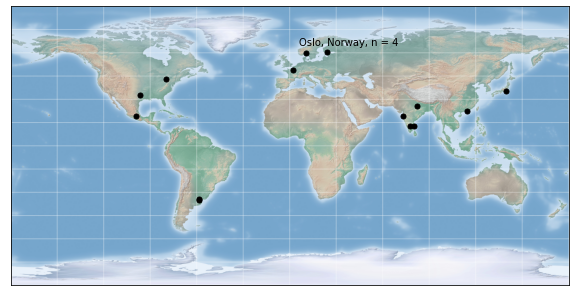

In [115]:
# change inline to  qt5 if need to save the figure
%matplotlib inline 
plot_map(count_city, figsize = (10,7), markersize = 5, fontsize = 10, verbose = False)

In [120]:
%matplotlib qt5 
plot_map(count_city, figsize = (10,5), markersize = 5, fontsize = 15, verbose = False)

In [121]:
plt.savefig('Map-of-Participants-4.png') # matplotlib inline doens't allow saving plt therefore make sure the backend is changed before drawing the plot.